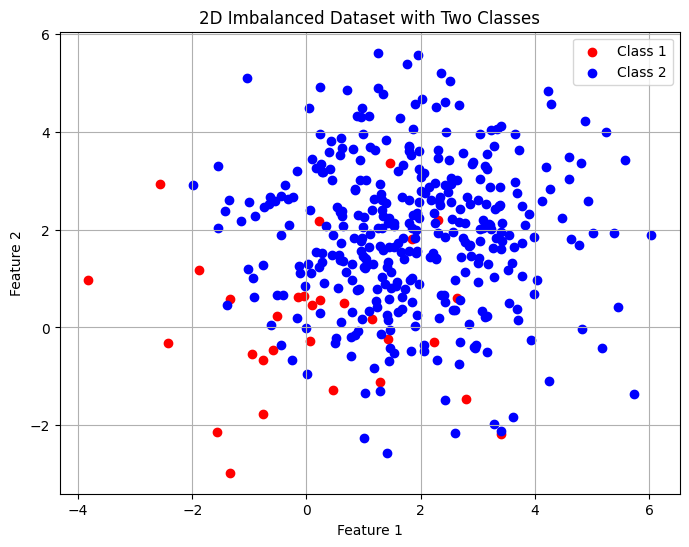

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd


# Set random seed for reproducibility
np.random.seed(0)

# Generate imbalanced dataset
n_sample_1 = 30                     # Number of samples in class 1
n_sample_2 = 360                    # Number of samples in class 2
centers = [(0, 0), (2, 2)]          # Centers of each cluster
cluster_std = [1.5, 1.5]            # Standard Deviation of each cluster

X, y = make_blobs(
    n_samples=[n_sample_1, n_sample_2],
    centers=centers,
    cluster_std=cluster_std,
    random_state=0
)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
pd.Series(y).value_counts()

1    360
0     30
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.95      1.00      0.97       109

    accuracy                           0.95       117
   macro avg       0.97      0.62      0.69       117
weighted avg       0.95      0.95      0.93       117



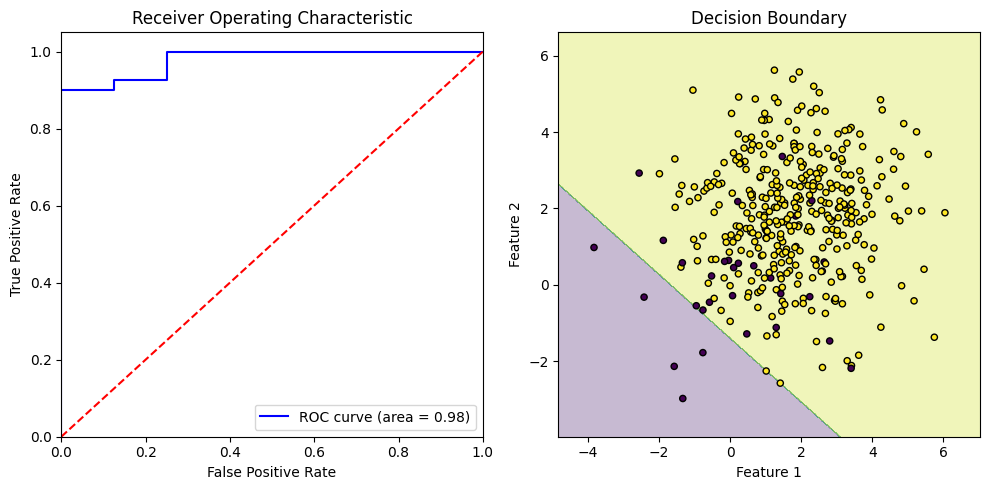

In [4]:
# Lets train a an Model on Imbalanced Data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediction on test set
y_pred = classifier.predict(X_test)

# Predict probabilities on the test set
y_proba = classifier.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

## *Random Undersampling*

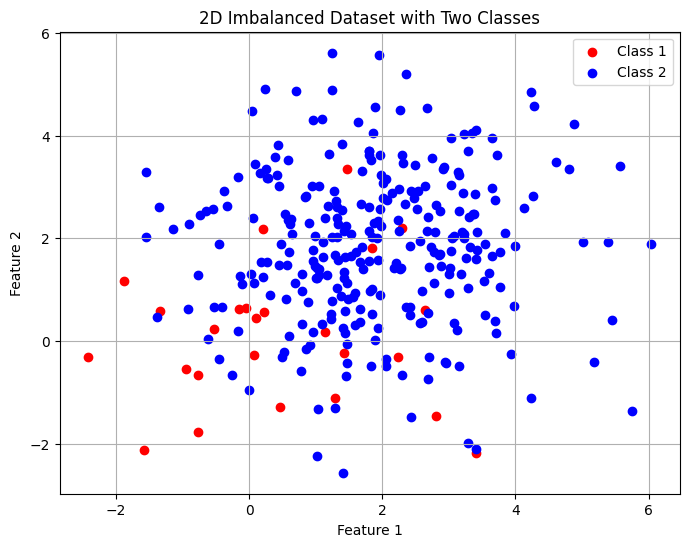

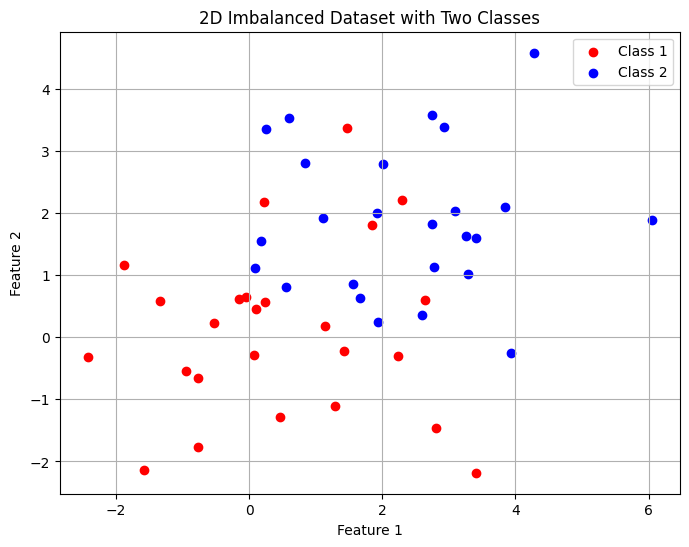

In [5]:
from imblearn.under_sampling import RandomUnderSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying random under sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled==0][:, 0], X_resampled[y_resampled==0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled==1][:, 0], X_resampled[y_resampled==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
pd.Series(y_train).value_counts(), pd.Series(y_resampled).value_counts()

(1    287
 0     25
 Name: count, dtype: int64,
 0    25
 1    25
 Name: count, dtype: int64)

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.21      1.00      0.34         5
           1       1.00      0.74      0.85        73

    accuracy                           0.76        78
   macro avg       0.60      0.87      0.60        78
weighted avg       0.95      0.76      0.82        78



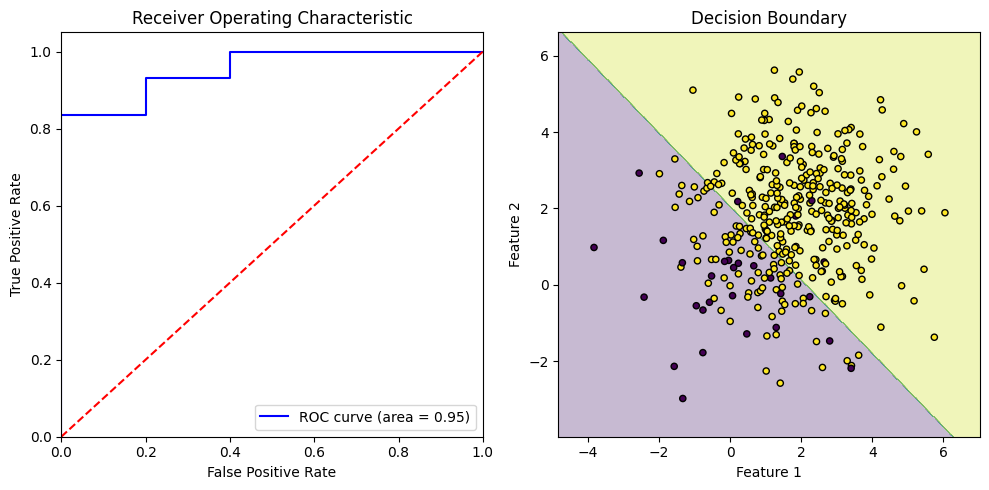

In [19]:
# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = model.predict(X_test)

# Predict probabilities on the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_rus))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

## *Random Oversampling*

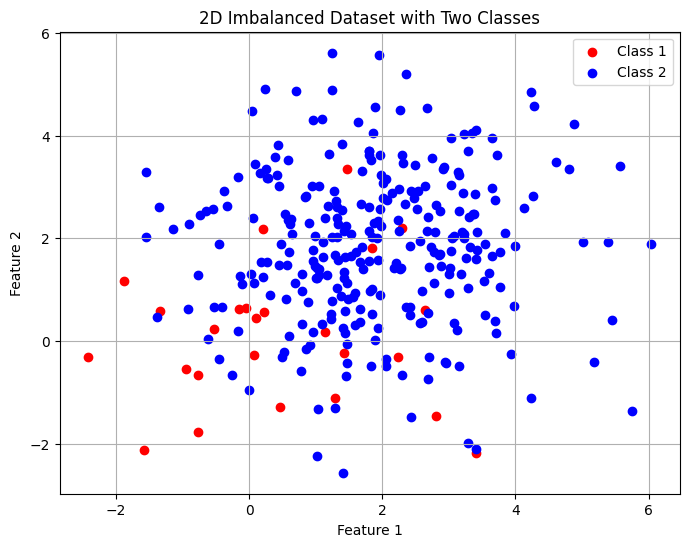

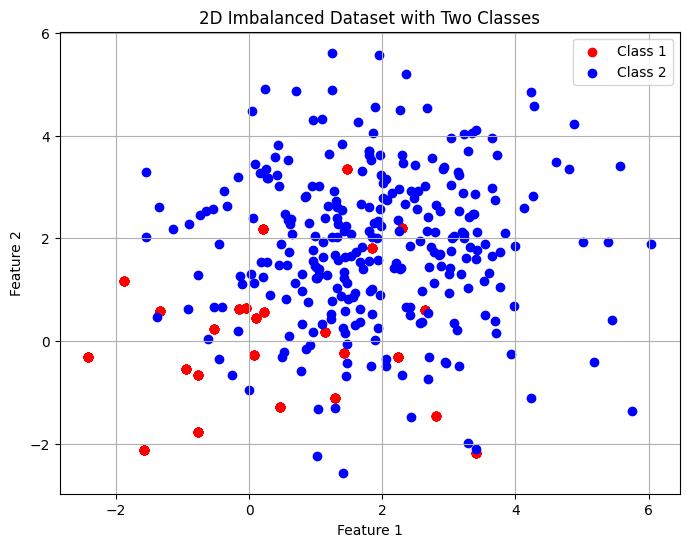

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying random under sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled==0][:, 0], X_resampled[y_resampled==0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled==1][:, 0], X_resampled[y_resampled==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
pd.Series(y_resampled).value_counts()

1    287
0    287
Name: count, dtype: int64

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.21      1.00      0.34         5
           1       1.00      0.74      0.85        73

    accuracy                           0.76        78
   macro avg       0.60      0.87      0.60        78
weighted avg       0.95      0.76      0.82        78



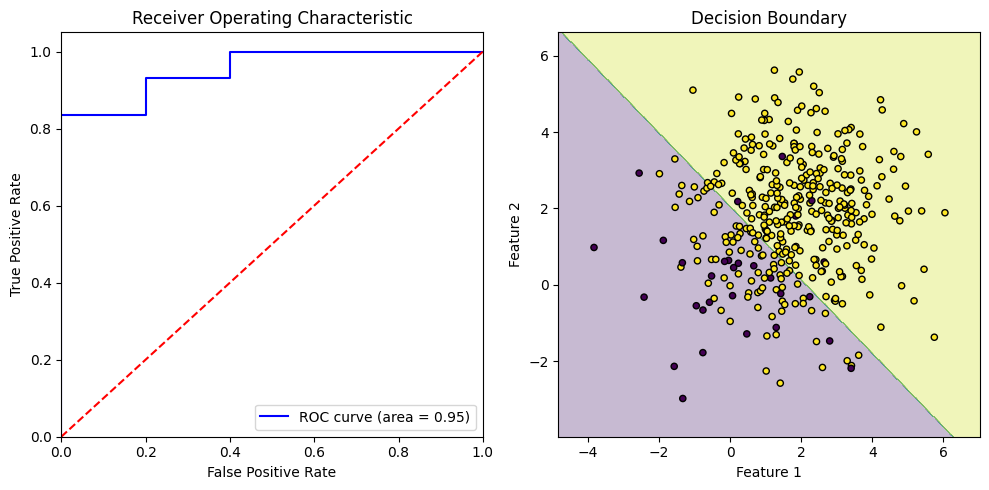

In [18]:
# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = model.predict(X_test)

# Predict probabilities on the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

## *SMOTE (Synthetic Minority Oversampling Technique)*

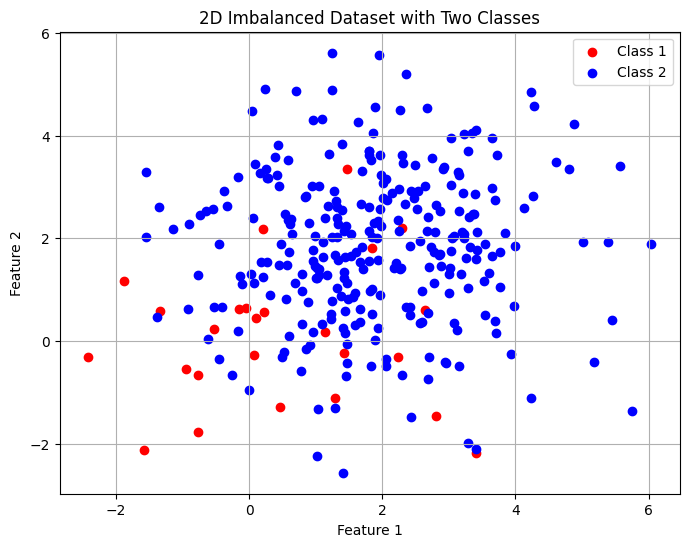

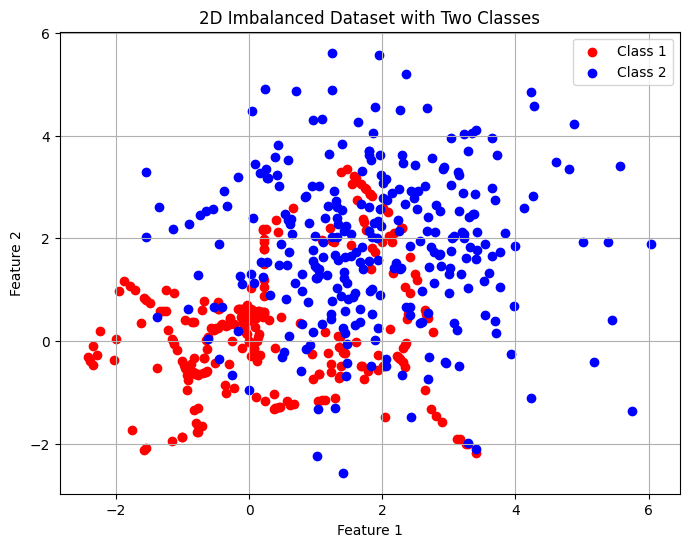

In [14]:
from imblearn.over_sampling import SMOTE

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying random under sampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled==0][:, 0], X_resampled[y_resampled==0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled==1][:, 0], X_resampled[y_resampled==1][:, 1], color='blue', label='Class 2')
plt.title("2D Imbalanced Dataset with Two Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
pd.Series(y_resampled).value_counts()

1    287
0    287
Name: count, dtype: int64

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.21      1.00      0.34         5
           1       1.00      0.74      0.85        73

    accuracy                           0.76        78
   macro avg       0.60      0.87      0.60        78
weighted avg       0.95      0.76      0.82        78



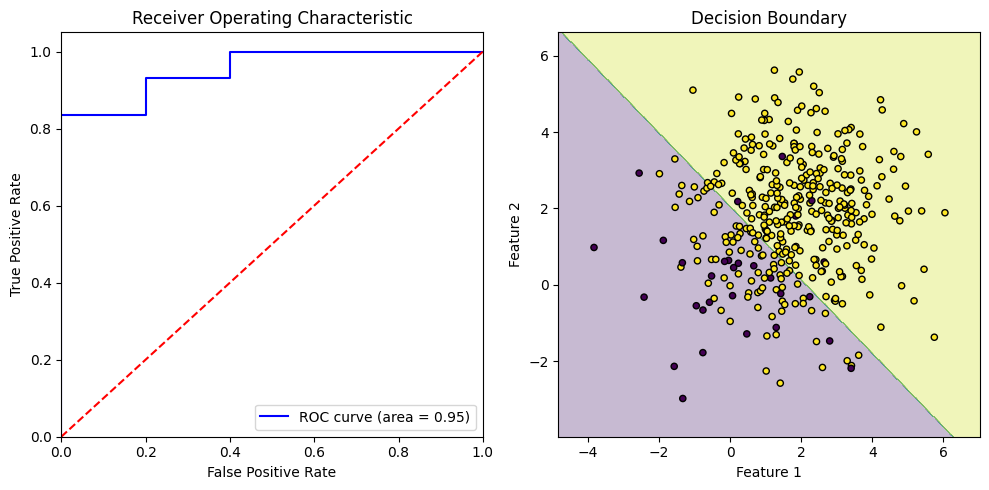

In [17]:
# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict test set
y_pred_smote = model.predict(X_test)

# Predict probabilities on the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_smote))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# *Balanced Random Forest*

c:\Users\csawa\desktop\AIML\Flask\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\csawa\desktop\AIML\Flask\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\csawa\desktop\AIML\Flask\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt th

Classification Report (With Balanced Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.22      0.80      0.35         5
           1       0.98      0.81      0.89        73

    accuracy                           0.81        78
   macro avg       0.60      0.80      0.62        78
weighted avg       0.93      0.81      0.85        78



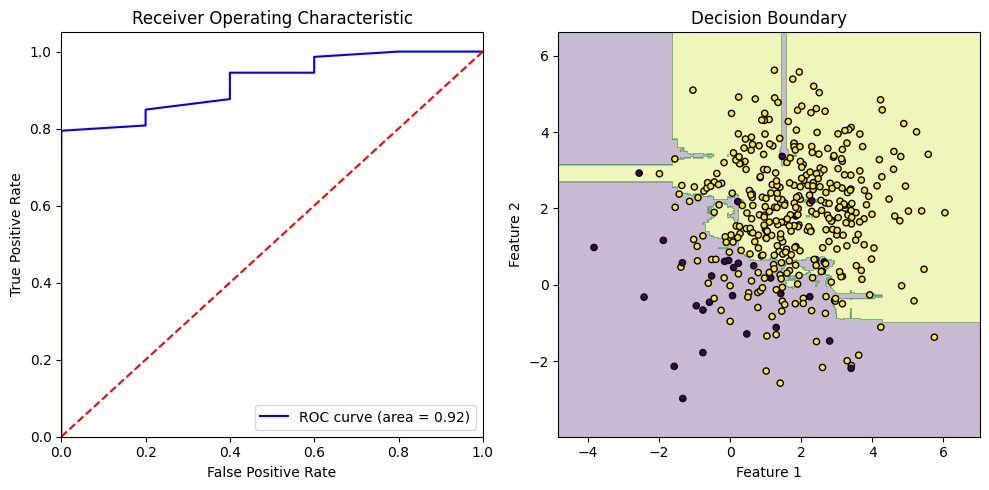

In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Balanced Random Forest Classifier sampling
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for Balanced Random Forest Classifier data
print("Classification Report (With Balanced Random Forest Classifier):")
print(classification_report(y_test, y_pred_brf))


# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_brf)
roc_auc = roc_auc_score(y_test, y_proba_brf)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## *Class Weights*

Classification Report:
              precision    recall  f1-score   support

           0       0.12      1.00      0.22         8
           1       1.00      0.47      0.64       109

    accuracy                           0.50       117
   macro avg       0.56      0.73      0.43       117
weighted avg       0.94      0.50      0.61       117



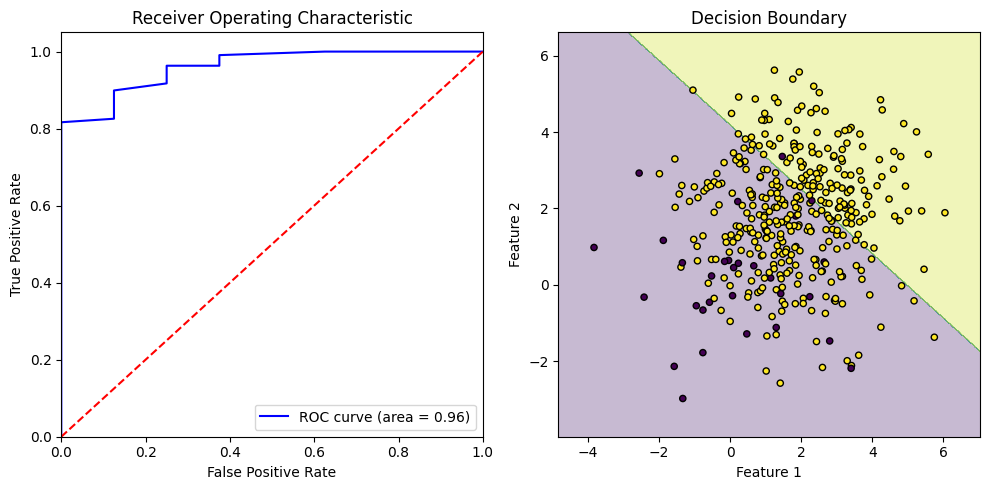

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model with class weights
model = LogisticRegression(class_weight={0:50,1:1}, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Decision Boundary
plt.subplot(1, 2, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()